In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'D:\other_stuff\projects\top_insta_influencers_data.csv')

In [3]:
print("Shape of Dataset:- ",data.shape)
data.head().style.background_gradient(cmap='YlOrRd')

Shape of Dataset:-  (200, 10)


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,nan
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [5]:
print(data.columns)

Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')


In [6]:
missing_values = data['country'].isnull()

In [7]:
for i in data[~missing_values]["country"].unique():
    if isinstance(i, str):  # Check if the value is a string to avoid TypeError
        print(i, len(i), "-----after removing space---->", i.strip(), len(i.strip()))
    else:
        print("Skipping:", i, "because it's not a string")


Spain 5 -----after removing space----> Spain 5
United States 13 -----after removing space----> United States 13
Canada 6 -----after removing space----> Canada 6
Brazil 6 -----after removing space----> Brazil 6
Netherlands 11 -----after removing space----> Netherlands 11
United Kingdom 14 -----after removing space----> United Kingdom 14
India 5 -----after removing space----> India 5
Uruguay 7 -----after removing space----> Uruguay 7
Turkey 6 -----after removing space----> Turkey 6
Indonesia 9 -----after removing space----> Indonesia 9
Colombia 8 -----after removing space----> Colombia 8
France 6 -----after removing space----> France 6
Australia 9 -----after removing space----> Australia 9
Italy 5 -----after removing space----> Italy 5
United Arab Emirates 20 -----after removing space----> United Arab Emirates 20
Puerto Rico 11 -----after removing space----> Puerto Rico 11
CÃ´te d'Ivoire 14 -----after removing space----> CÃ´te d'Ivoire 14
Anguilla 8 -----after removing space----> Anguill

In [8]:
data['channel_info'].duplicated().any()

False

In [9]:
data['posts']=data['posts'].apply(lambda x: int(x) if "k" not in x else int(float(x.replace('k',""))*1000) )

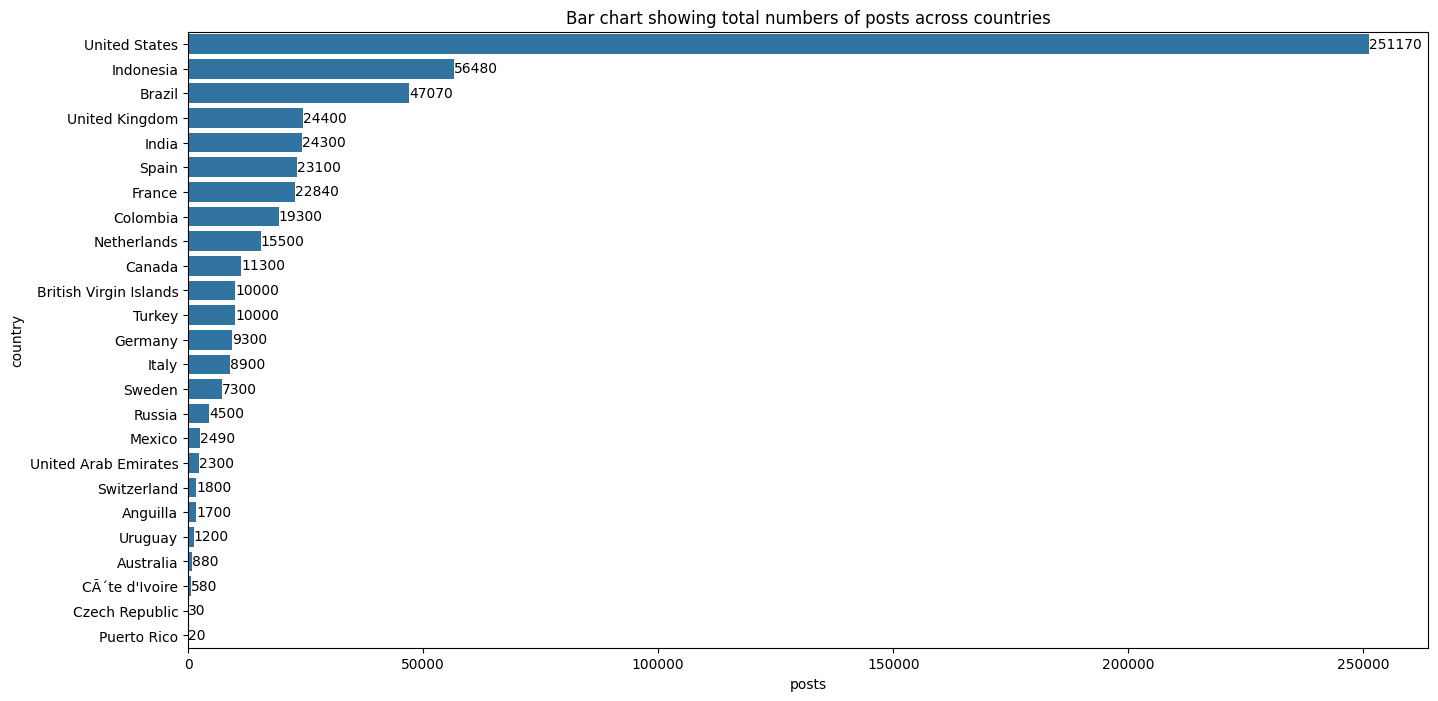

In [10]:
posts_count_on_country=data.groupby(['country'],as_index=False)['posts'].sum()
posts_count_on_country.reset_index(drop=True,inplace=True)
posts_count_on_country.sort_values(['posts'],inplace=True,ascending=False)
plt.figure(figsize=(16, 8))
plt.title("Bar chart showing total numbers of posts across countries")
ax=sns.barplot(y='country', x='posts', data=posts_count_on_country);
ax.bar_label(ax.containers[0])
plt.show()

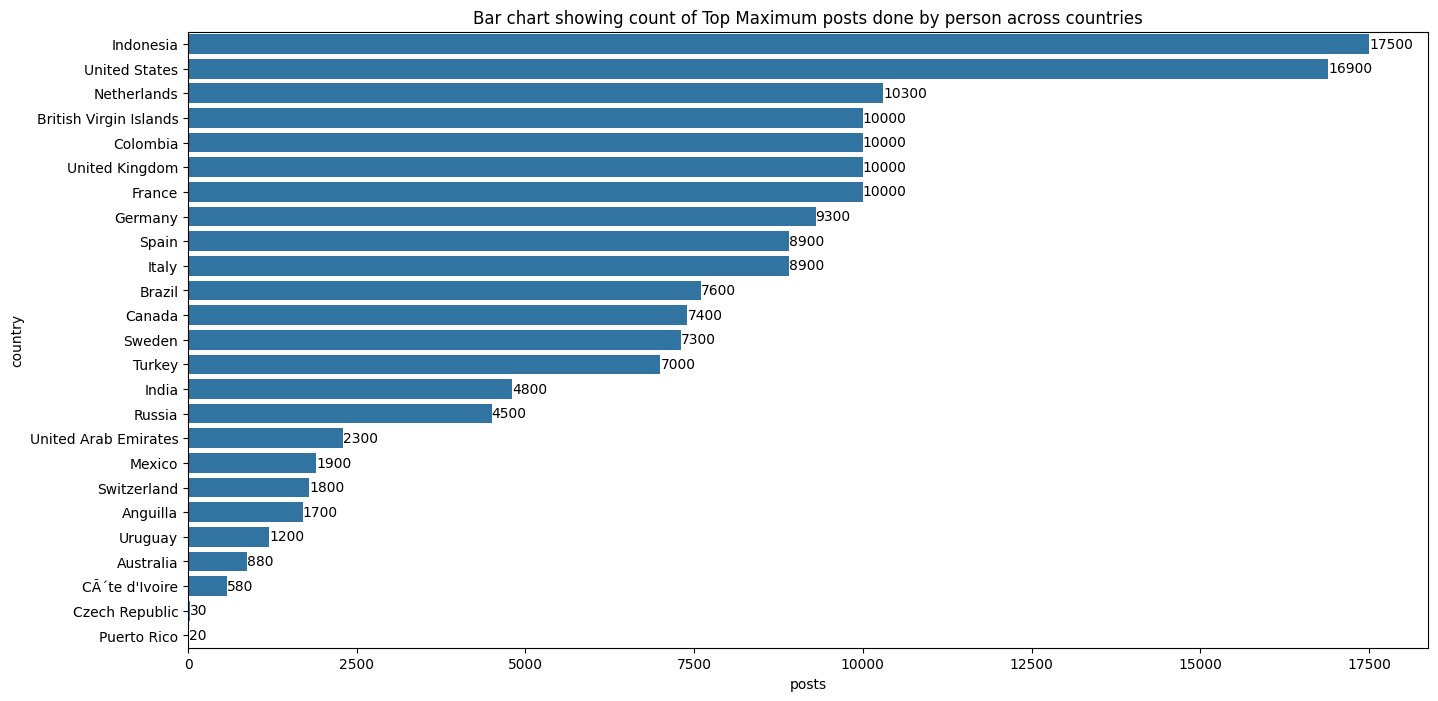

In [11]:
posts_count_on_country=data.groupby(['country'],as_index=False)['posts'].max()
posts_count_on_country.reset_index(drop=True,inplace=True)
posts_count_on_country.sort_values(['posts'],inplace=True,ascending=False)
plt.figure(figsize=(16, 8))
plt.title("Bar chart showing count of Top Maximum posts done by person across countries")
ax=sns.barplot(y='country', x='posts', data=posts_count_on_country);
ax.bar_label(ax.containers[0])
plt.show()

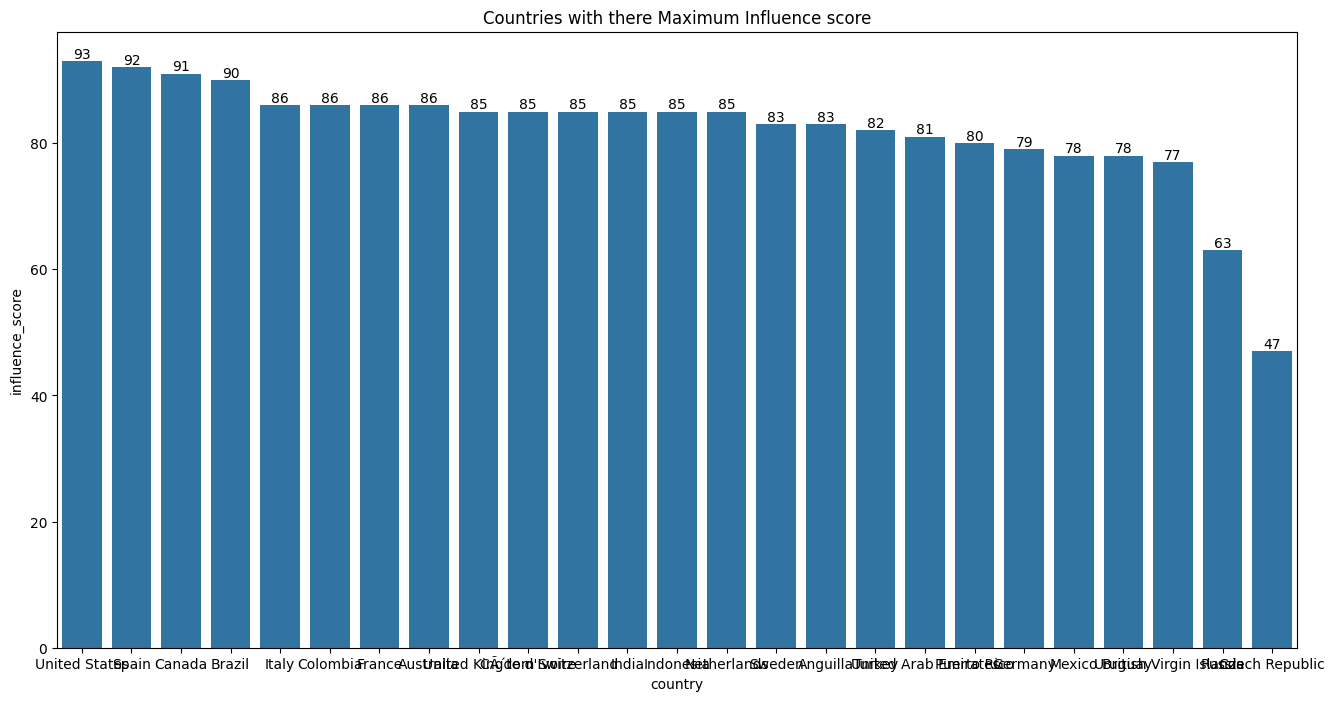

In [12]:
most_influence_country=data.groupby(['country'],as_index=False)['influence_score'].max()
most_influence_country.reset_index(drop=True,inplace=True)
most_influence_country.sort_values(by=['influence_score'],inplace=True,ascending=False)
plt.figure(figsize=(16, 8))
plt.title("Countries with there Maximum Influence score")
ax=sns.barplot(
    data=most_influence_country, x="country", y="influence_score")
ax.bar_label(ax.containers[0])
plt.xticks(rotation='horizontal')
plt.show()

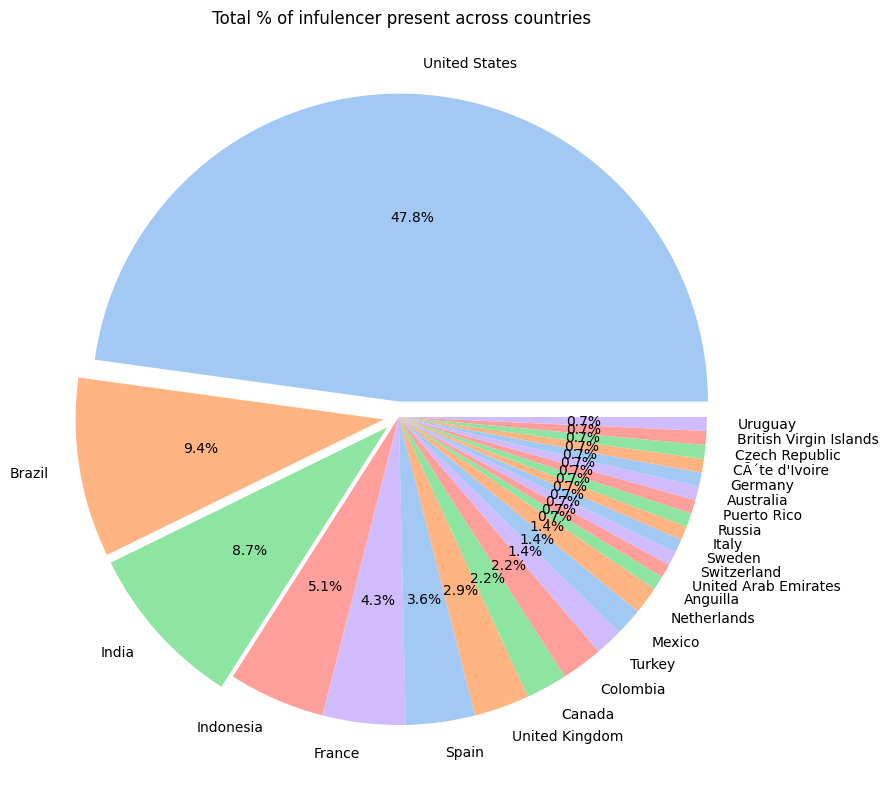

In [13]:
data["Entries"]=1
No_of_infulencer_per_country=data.groupby(["country"],as_index=False)['Entries'].sum()
No_of_infulencer_per_country.sort_values(by=['Entries'],ascending=False,inplace=True)
plt.figure(figsize=(15, 10))
plt.title(" Total % of infulencer present across countries")
explode = No_of_infulencer_per_country['Entries'].apply(lambda x:0.05 if x>10 else 0)
colors = sns.color_palette('pastel')[0:5]
plt.pie(No_of_infulencer_per_country['Entries'].tolist(), labels = No_of_infulencer_per_country["country"].tolist()
        , colors = colors, autopct='%1.1f%%',explode = explode)
plt.show()

---------------------  Posts Vs Likes plot for Top 2 Infulencing Countries  ---------------------


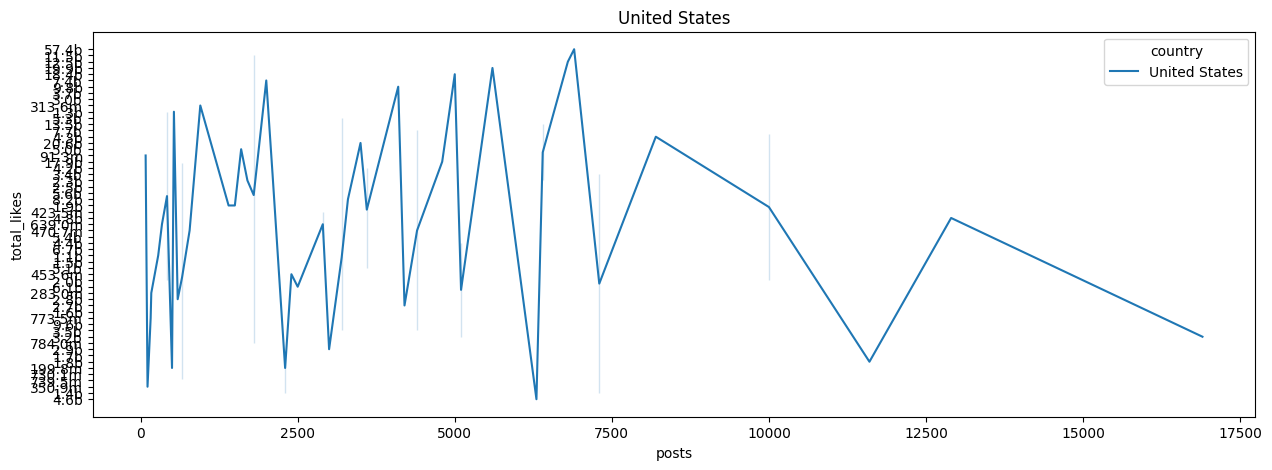

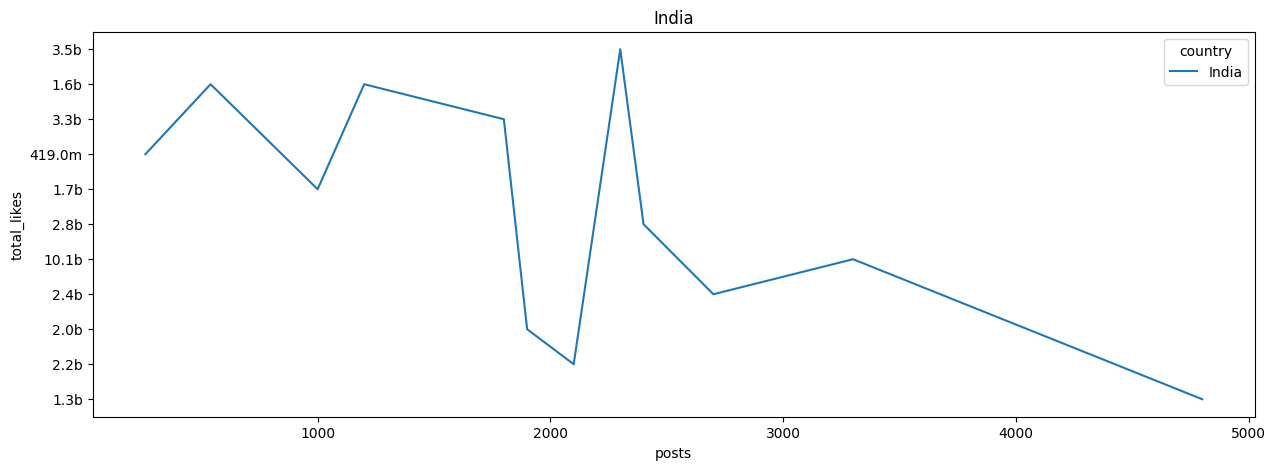

---------------------------------------------------
If you post more doesn't mean you'll get more likes
---------------------------------------------------


In [14]:
print("---------------------  Posts Vs Likes plot for Top 2 Infulencing Countries  ---------------------")
plt.figure(figsize=(15, 5))
plt.title("United States")
USA_data=data[data['country'].isin(["United States"])]
sns.lineplot(data=USA_data, x="posts", y="total_likes",hue='country')
plt.show()
#-------------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
plt.title("India")
India_data=data[data['country'].isin(["India"])]
sns.lineplot(data=India_data, x="posts", y="total_likes",hue='country')
plt.show()
print("---------------------------------------------------")
print("If you post more doesn't mean you'll get more likes")
print("---------------------------------------------------")

Followers Vs Likes plot for Top 2 Infulencing Countries


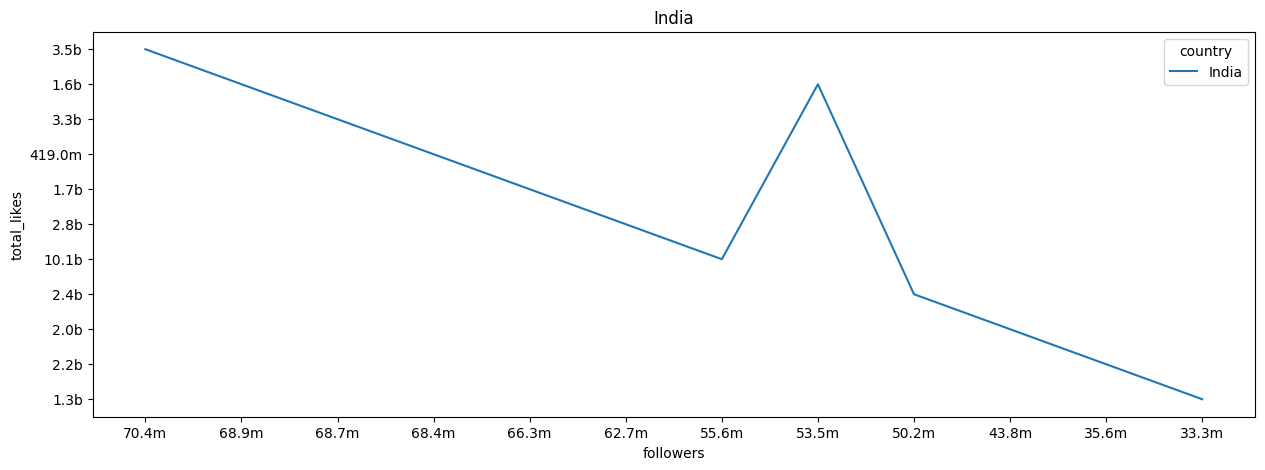

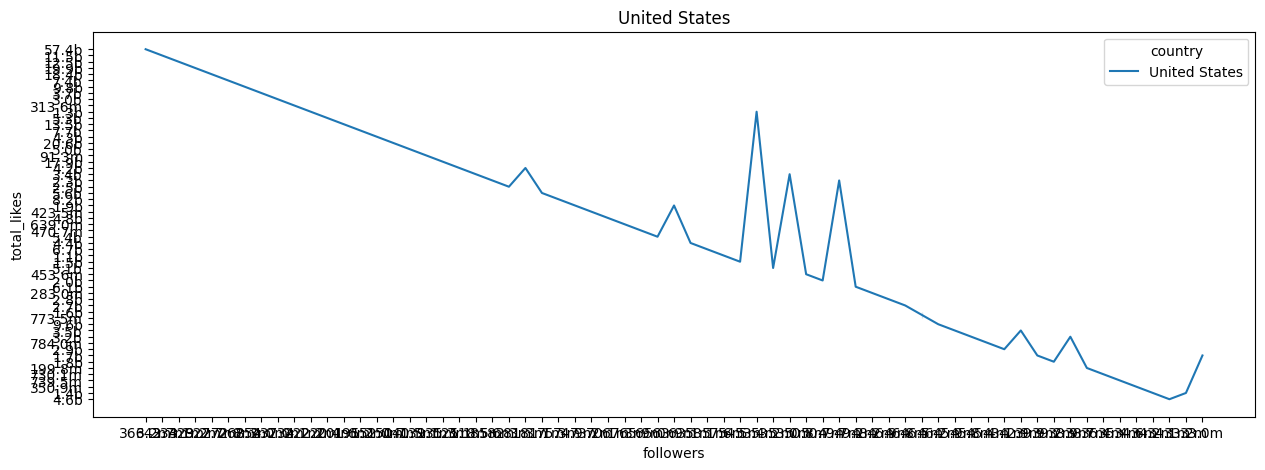

------------------------------------------------------------------------------------------
If you have more followers there is good probability that you can get good amount of Likes
------------------------------------------------------------------------------------------


In [15]:
print("Followers Vs Likes plot for Top 2 Infulencing Countries")
plt.figure(figsize=(15, 5))
plt.title("India")
India_data=data[data['country'].isin(["India"])]
sns.lineplot(data=India_data, x="followers", y="total_likes",hue='country')
plt.show()
plt.figure(figsize=(15, 5))
plt.title("United States")
USA_data=data[data['country'].isin(["United States"])]
sns.lineplot(data=USA_data, x="followers", y="total_likes",hue='country')
plt.show()

print("------------------------------------------------------------------------------------------")
print("If you have more followers there is good probability that you can get good amount of Likes")
print("------------------------------------------------------------------------------------------")

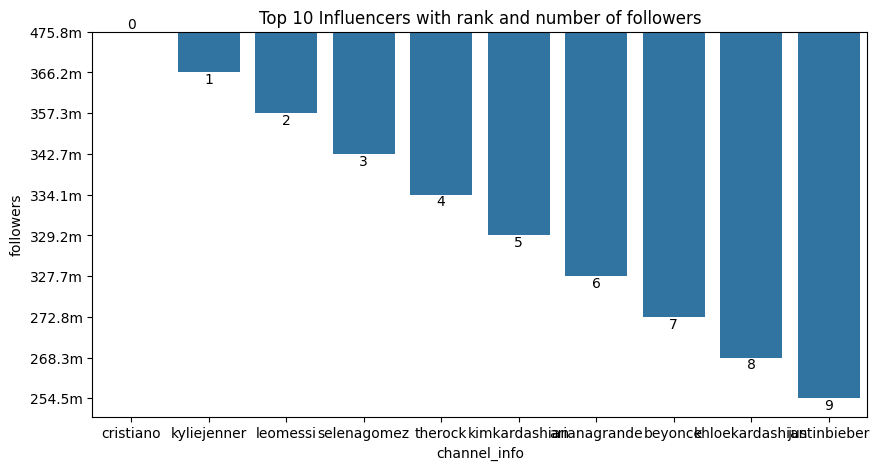

In [16]:
plt.figure(figsize=(10,5 ))
plt.title("Top 10 Influencers with rank and number of followers")
ax=sns.barplot(data=data.head(10), x="channel_info",y="followers")
ax.bar_label(ax.containers[0])
plt.xticks(rotation='horizontal')
# show the graph
plt.show()

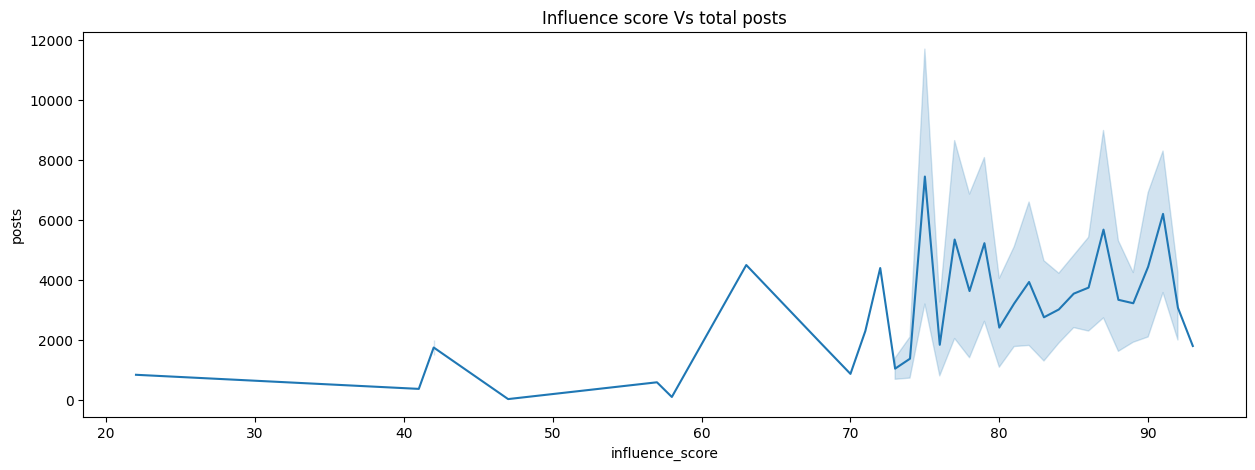

---------------------------------------------------------------------------------------------------------------------
People with highest Influence score have decent numbers of post but that doesn't mean they are at top because of 
there number of posts
---------------------------------------------------------------------------------------------------------------------


In [17]:
plt.figure(figsize=(15, 5))
plt.title("Influence score Vs total posts")
sns.lineplot(data=data, x="influence_score", y="posts")
plt.show()

print("---------------------------------------------------------------------------------------------------------------------")
print("People with highest Influence score have decent numbers of post but that doesn't mean they are at top because of \nthere number of posts")
print("---------------------------------------------------------------------------------------------------------------------")

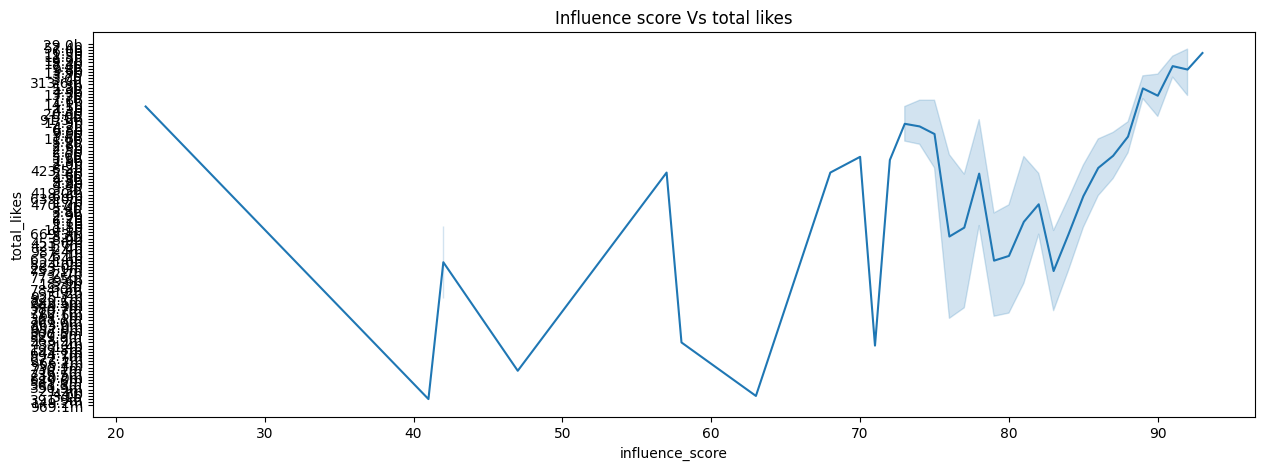

---------------------------------------------------------------------------------------------------------------------
People with highest Influence score have decent numbers of likes but that doesn't mean they are at top because of 
there number of likes
---------------------------------------------------------------------------------------------------------------------


In [18]:
plt.figure(figsize=(15, 5))
plt.title("Influence score Vs total likes")
sns.lineplot(data=data, x="influence_score", y="total_likes")
plt.show()

print("---------------------------------------------------------------------------------------------------------------------")
print("People with highest Influence score have decent numbers of likes but that doesn't mean they are at top because of \nthere number of likes")
print("---------------------------------------------------------------------------------------------------------------------")

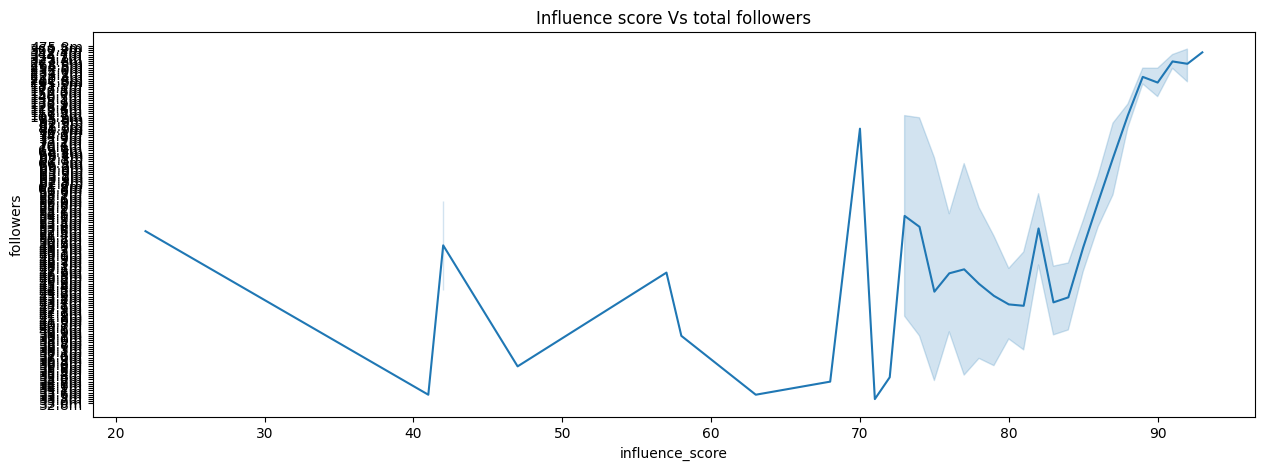

-------------------------------------------------------------------------------------------
People with highest Influence score have high numbers of followers and the graphs proves it
-------------------------------------------------------------------------------------------


In [19]:
plt.figure(figsize=(15,5))
plt.title("Influence score Vs total followers")
sns.lineplot(data=data, x="influence_score", y="followers")
plt.show()

print("-------------------------------------------------------------------------------------------")
print("People with highest Influence score have high numbers of followers and the graphs proves it")
print("-------------------------------------------------------------------------------------------")